<a href="https://colab.research.google.com/github/Rash-Anj/CropRecommendation_Python/blob/main/SVMclassifier_194011B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset from Google Drive in Colab
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataMining_GroupProject/Crop_recommendation.csv')

df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# **Data Pre-processing**

**Handling Missing Values**

In [ ]:
missing_values = df.isna().sum()
print(missing_values)

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows


,N,P,K,temperature,humidity,ph,rainfall,label


In [ ]:
selected_columns = ['N','P', 'K', 'temperature','humidity','ph','rainfall']
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outlier_counts = df[selected_columns].apply(count_outliers)
print("\nCount of Outliers for Selected Columns:")
print(outlier_counts)


Count of Outliers for Selected Columns:
N                0
P              138
K              200
temperature     86
humidity        30
ph              57
rainfall       100
dtype: int64


**Handling outliers (Z-Score)**

In [ ]:
z_score_threshold = 2

# Function to handle outliers using the Z-score method
def handle_outliers_with_z_score(column):
    mean = column.mean()
    std = column.std()
    z_scores = (column - mean) / std
    outliers = abs(z_scores) >= z_score_threshold
    column[outliers] = mean
    return column

# Apply the Z-score method to handle outliers for specified columns
selected_columns = ['P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[selected_columns] = df[selected_columns].apply(handle_outliers_with_z_score)

In [ ]:
selected_columns = ['N','P', 'K', 'temperature','humidity','ph','rainfall']
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers.sum()

outlier_counts = df[selected_columns].apply(count_outliers)
print("\nCount of Outliers for Selected Columns:")
print(outlier_counts)


Count of Outliers for Selected Columns:
N               0
P               0
K               0
temperature     1
humidity        0
ph              0
rainfall       78
dtype: int64


**Ensuring the Dataset is clean**

1. Data Summary Statistics

In [ ]:
summary_stats = df.describe()

print(summary_stats)

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    46.088884    34.344463    25.474834    76.231678   
std      36.917334    21.147413    16.624745     3.966676    14.965308   
min       0.000000     5.000000     5.000000    15.538348    30.400468   
25%      21.000000    28.000000    20.000000    23.074727    65.899388   
50%      37.000000    51.000000    32.000000    25.616244    80.473146   
75%      84.250000    60.000000    48.149091    28.115364    89.948771   
max     140.000000    95.000000    85.000000    35.676673    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.461605    96.969302  
std       0.608937    44.987625  
min       4.931891    20.211267  
25%       6.023662    64.551686  
50%       6.459648    94.867624  
75%       6.861111   116.049192  
max       8.016211   213.356092  


2. Data Visualization

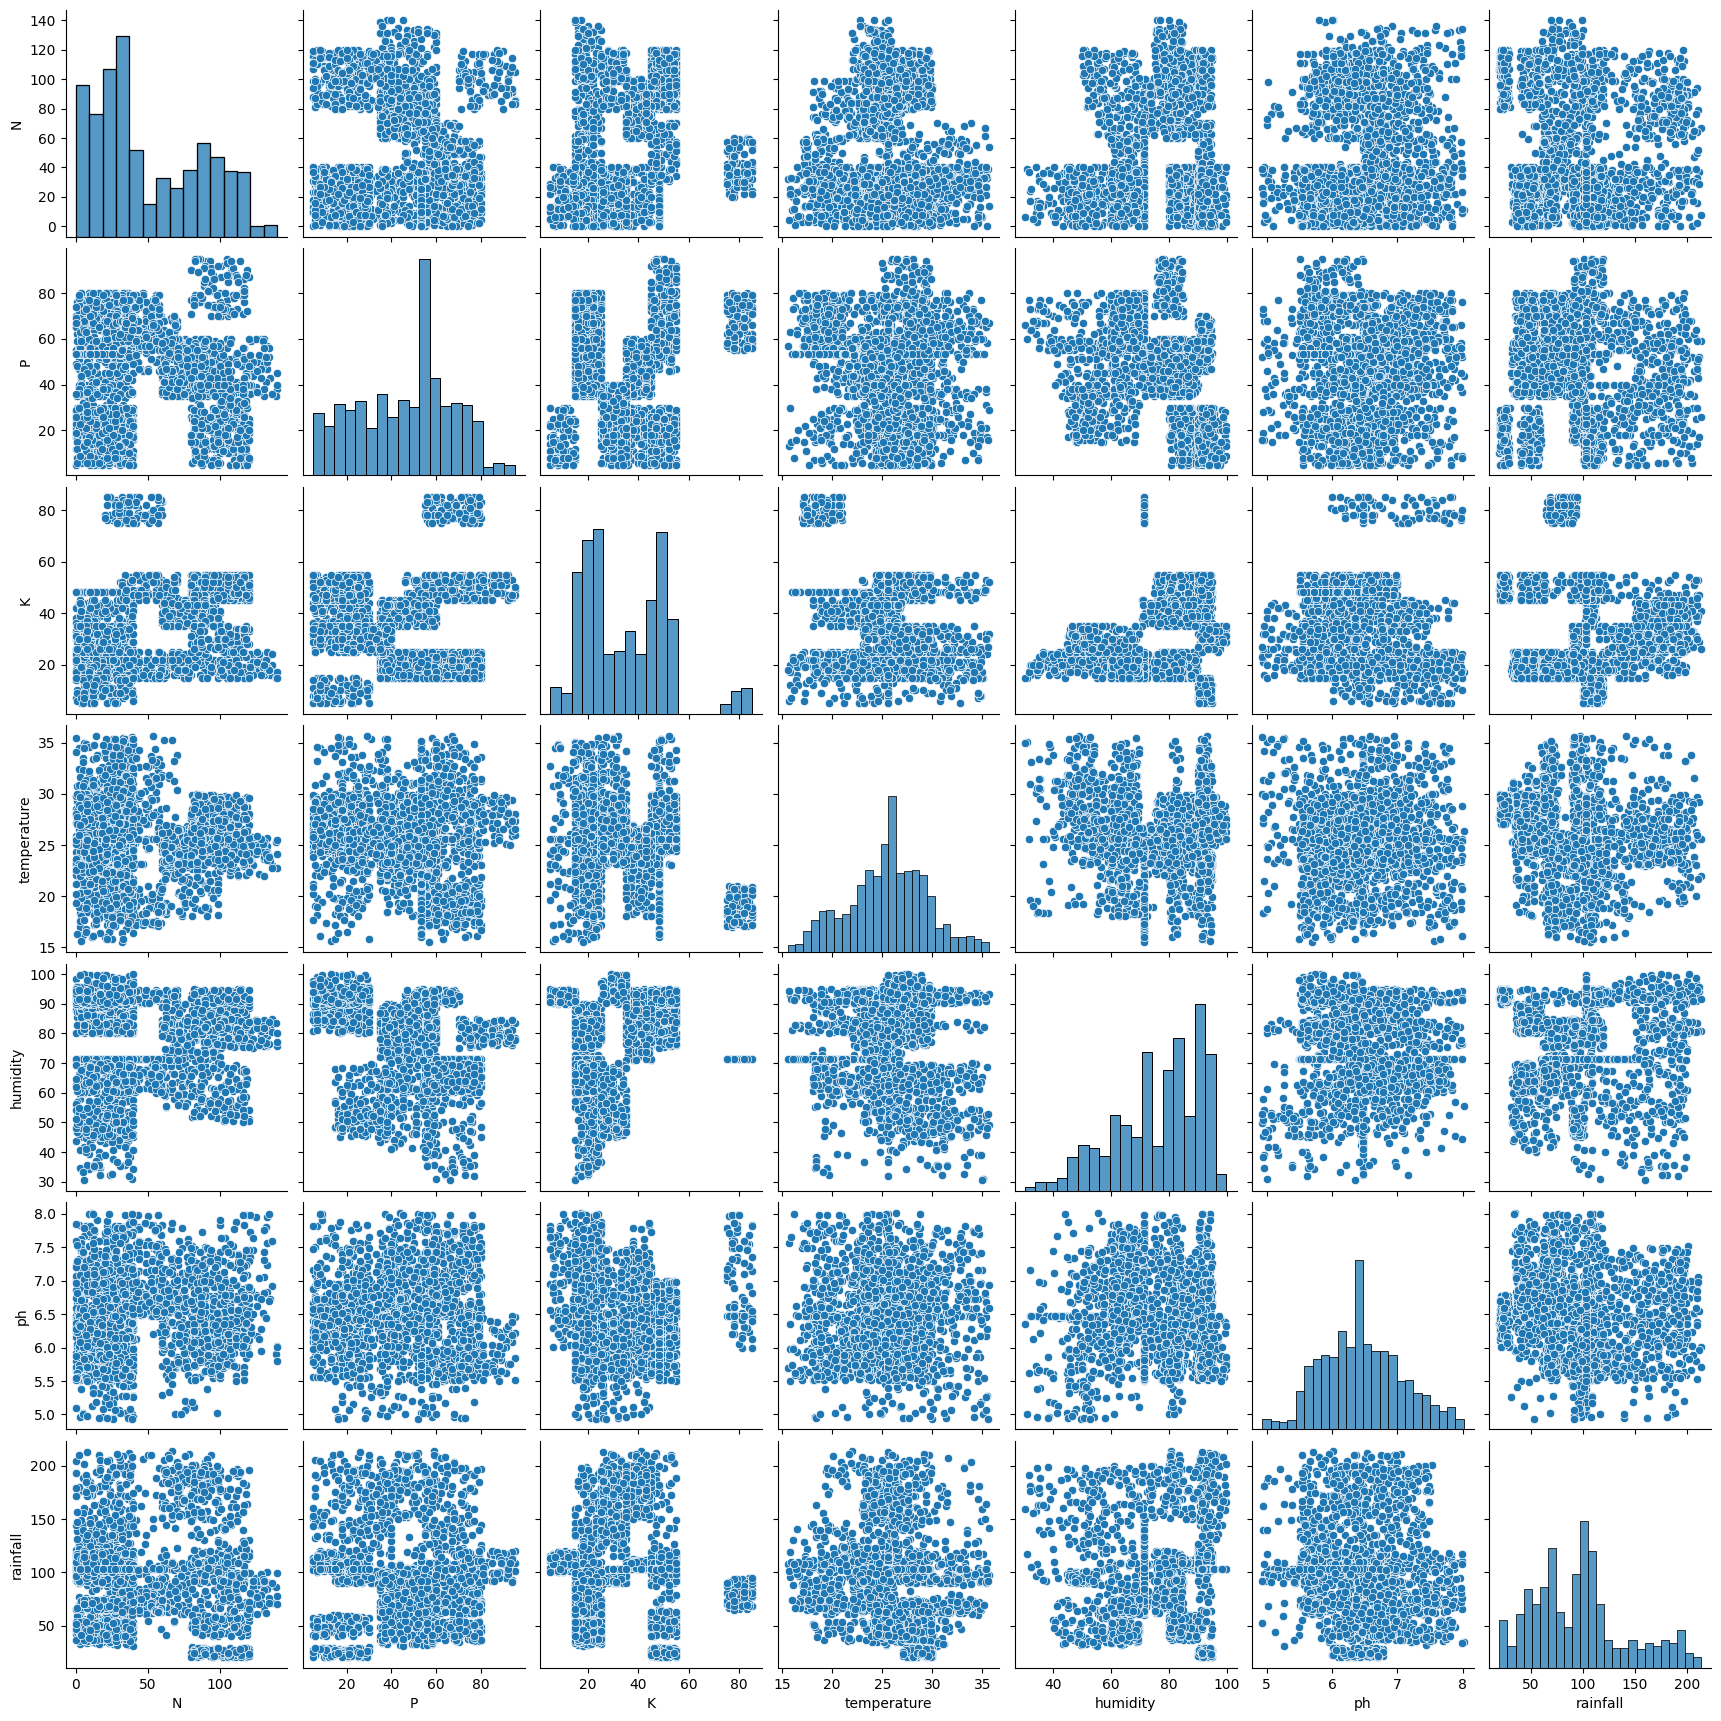

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['N','P','K','temperature','humidity', 'ph', 'rainfall']
sns.pairplot(df[cols])
plt.show()

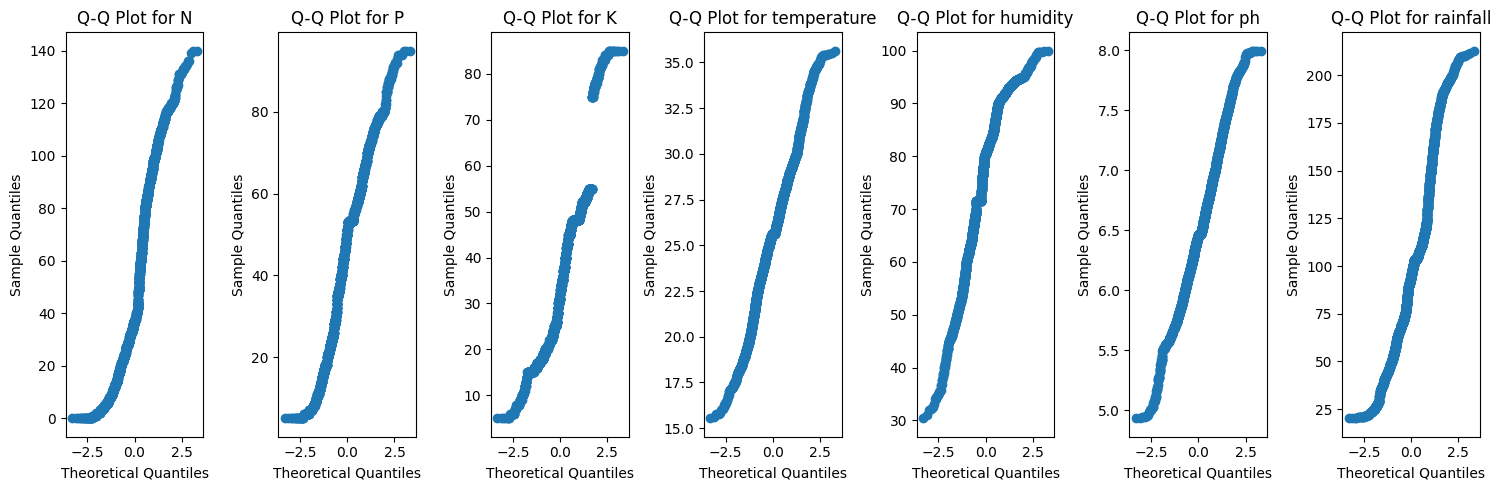

In [ ]:
import scipy.stats as stats
cols = ['N','P','K','temperature','humidity', 'ph', 'rainfall']

fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(15, 5))

for i, col in enumerate(cols):
    sorted_data = sorted(df[col])
    normal_quantiles = [stats.norm.ppf(i / len(sorted_data)) for i in range(1, len(sorted_data) + 1)]

    axes[i].scatter(normal_quantiles, sorted_data)
    axes[i].set_title(f'Q-Q Plot for {col}')
    axes[i].set_xlabel('Theoretical Quantiles')
    axes[i].set_ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()


In [ ]:
value_counts = df['label'].value_counts()

print("Unique Values and Counts of label:")
print(value_counts)

Unique Values and Counts of label:
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64


**CIR = 100/100 = 1**

In [ ]:
total_instances = 2200

# Number of classes
num_classes = 22

# Instances per class
instances_per_class = 100

# Calculate class proportions
class_proportions = {f'Class_{i}': instances_per_class / total_instances for i in range(1, num_classes + 1)}

# Print the class proportions
print(class_proportions)

{'Class_1': 0.045454545454545456, 'Class_2': 0.045454545454545456, 'Class_3': 0.045454545454545456, 'Class_4': 0.045454545454545456, 'Class_5': 0.045454545454545456, 'Class_6': 0.045454545454545456, 'Class_7': 0.045454545454545456, 'Class_8': 0.045454545454545456, 'Class_9': 0.045454545454545456, 'Class_10': 0.045454545454545456, 'Class_11': 0.045454545454545456, 'Class_12': 0.045454545454545456, 'Class_13': 0.045454545454545456, 'Class_14': 0.045454545454545456, 'Class_15': 0.045454545454545456, 'Class_16': 0.045454545454545456, 'Class_17': 0.045454545454545456, 'Class_18': 0.045454545454545456, 'Class_19': 0.045454545454545456, 'Class_20': 0.045454545454545456, 'Class_21': 0.045454545454545456, 'Class_22': 0.045454545454545456}


In [ ]:
class_proportions = [0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456]

# Calculate the Gini coefficient
gini = 1 - (22*((0.0455**2) * 0.045454545454545456))

print("Gini Coefficient:", gini)

Gini Coefficient: 0.99792975


# **SVM (Support Vector Machine) Classifier**

# Observations:


*   The target variable is categorical and has 22 classes and one instance belongs to only one class.
*   Which means this is a **Multi-Class** Classification problem.
*   And also there is **no class imbalance**.
*   Primary concern of this project is the **accuracy**.
*   For all these reasons; decided to use **SVM** **Classifier** on the dataset.







In [ ]:
# import necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



*   Since SVM is sensitive to the scale of input features; let's do **feature scaling** first.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Select columns to scale
features_to_scale = ['N','P','K','temperature','humidity', 'ph', 'rainfall']
data_to_scale = df[features_to_scale]

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Scale the selected features
scaled_data = scaler.fit_transform(data_to_scale)
x = pd.DataFrame(scaled_data)
x

,0,1,2,3,4,5,6
0,0.642857,0.411111,0.4750,0.265235,0.741610,0.509381,0.946048
1,0.607143,0.588889,0.4500,0.309465,0.717421,0.682875,0.431036
2,0.428571,0.555556,0.4875,0.370741,0.746181,0.942936,0.431036
3,0.528571,0.333333,0.4375,0.543876,0.715103,0.664169,0.431036
4,0.557143,0.411111,0.4625,0.228014,0.735892,0.874287,0.431036
...,...,...,...,...,...,...,...
2195,0.764286,0.322222,0.3375,0.557955,0.517564,0.599216,0.815778
2196,0.707143,0.111111,0.2750,0.589859,0.377053,0.374485,0.557682
2197,0.842857,0.311111,0.3125,0.426721,0.529231,0.463868,0.792729
2198,0.835714,0.300000,0.3625,0.533017,0.312252,0.592319,0.553802


In [ ]:
x.describe()

,0,1,2,3,4,5,6
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,0.361084,0.456543,0.366806,0.493412,0.658670,0.495965,0.397412
std,0.263695,0.234971,0.207809,0.196972,0.215076,0.197430,0.232922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150000,0.255556,0.187500,0.374231,0.510178,0.353975,0.229571
50%,0.264286,0.511111,0.337500,0.500434,0.719627,0.495330,0.386530
75%,0.601786,0.611111,0.539364,0.624531,0.855808,0.625493,0.496197
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
categorical_features = ['label']
for cat_feat in categorical_features:
  unique_values = df[cat_feat].unique()
  print(cat_feat ,len(list(unique_values)) )
  classes = {}
  for value in list(unique_values):
    classes[value] = list(unique_values).index(value)
  print(classes)
  df[cat_feat] = df[cat_feat].map(classes)
print(df)

label 22
{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}
        N     P     K  temperature   humidity        ph    rainfall  label
0      90  42.0  43.0    20.879744  82.002744  6.502985  202.935536      0
1      85  58.0  41.0    21.770462  80.319644  7.038096  103.463655      0
2      60  55.0  44.0    23.004459  82.320763  7.840207  103.463655      0
3      74  35.0  40.0    26.491096  80.158363  6.980401  103.463655      0
4      78  42.0  42.0    20.130175  81.604873  7.628473  103.463655      0
...   ...   ...   ...          ...        ...       ...         ...    ...
2195  107  34.0  32.0    26.774637  66.413269  6.780064  177.774507     21
2196   99  15.0  27.0    27.417112  56.636362  6.086922  127.924610

In [ ]:
# seperate features and target variable
target_var = 'label'
y = df[target_var]
print(y)
print(x)

0        0
1        0
2        0
3        0
4        0
        ..
2195    21
2196    21
2197    21
2198    21
2199    21
Name: label, Length: 2200, dtype: int64
             0         1       2         3         4         5         6
0     0.642857  0.411111  0.4750  0.265235  0.741610  0.509381  0.946048
1     0.607143  0.588889  0.4500  0.309465  0.717421  0.682875  0.431036
2     0.428571  0.555556  0.4875  0.370741  0.746181  0.942936  0.431036
3     0.528571  0.333333  0.4375  0.543876  0.715103  0.664169  0.431036
4     0.557143  0.411111  0.4625  0.228014  0.735892  0.874287  0.431036
...        ...       ...     ...       ...       ...       ...       ...
2195  0.764286  0.322222  0.3375  0.557955  0.517564  0.599216  0.815778
2196  0.707143  0.111111  0.2750  0.589859  0.377053  0.374485  0.557682
2197  0.842857  0.311111  0.3125  0.426721  0.529231  0.463868  0.792729
2198  0.835714  0.300000  0.3625  0.533017  0.312252  0.592319  0.553802
2199  0.742857  0.144444  0.3125  0.

In [ ]:
# split the dataset into features(x) and target(y) variable

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Create and Train the SVM Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
# Make predictions on the training data
train_predictions = svm_classifier.predict(X_train)

# Evaluate accuracy on training data
train_accuracy = accuracy_score(y_train, train_predictions)
print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))

# Generate classification report for training data
print("Classification Report (Training Data):\n", classification_report(y_train, train_predictions))


Training Accuracy: 98.69%
Classification Report (Training Data):
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        81
           1       1.00      1.00      1.00        79
           2       1.00      1.00      1.00        74
           3       0.98      1.00      0.99        80
           4       1.00      0.97      0.99        77
           5       0.97      1.00      0.99        76
           6       1.00      1.00      1.00        81
           7       0.99      1.00      0.99        80
           8       1.00      0.97      0.98        89
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        79
          11       1.00      1.00      1.00        81
          12       1.00      1.00      1.00        86
          13       1.00      1.00      1.00        81
          14       1.00      1.00      1.00        83
          15       1.00      1.00      1.00        77
          16   

In [ ]:
# Make predictions on the test data
test_predictions = svm_classifier.predict(X_test)

# Evaluate accuracy on test data
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

# Generate classification report for test data
print("Classification Report (Test Data):\n", classification_report(y_test, test_predictions))


Test Accuracy: 96.82%
Classification Report (Test Data):
               precision    recall  f1-score   support

           0       1.00      0.58      0.73        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        26
           3       0.95      1.00      0.98        20
           4       1.00      0.91      0.95        23
           5       0.96      0.92      0.94        24
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        20
           8       0.79      1.00      0.88        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       1.00

# **Observations**


*   Training Accuracy: 98.69%
*   Test Accuracy: 96.82%

*   There's only a slight difference between the Training Accuracy and the Text Accuracy.
*   It indicates that the model generalizes well to unseen data.

*   No sign of Underfitting or Overfitting.







# **Application of the Model**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   float64
 2   K            2200 non-null   float64
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 137.6 KB


In [ ]:
print(X_test)
print(y_test)
X_test[1]

             0         1         2         3         4         5         6
1451  0.721429  0.133333  0.525000  0.692990  0.924519  0.406301  0.031567
1334  0.700000  0.033333  0.575000  0.528395  0.806568  0.430385  0.151282
1761  0.421429  0.633333  0.550000  0.500434  0.904717  0.651556  0.489616
1735  0.314286  0.611111  0.625000  0.930669  0.864529  0.613905  0.405547
1576  0.214286  0.537364  0.539364  0.366264  0.866672  0.217721  0.509427
...        ...       ...       ...       ...       ...       ...       ...
59    0.707143  0.555556  0.375000  0.307150  0.716262  0.508964  0.431036
71    0.478571  0.444444  0.412500  0.357009  0.744024  0.767923  0.431036
1908  0.864286  0.466667  0.137500  0.400594  0.702706  0.905013  0.270713
1958  0.828571  0.522222  0.175000  0.367678  0.646311  0.383435  0.242662
482   0.035714  0.700000  0.187500  0.174069  0.038897  0.385750  0.699782

[440 rows x 7 columns]
1451    14
1334    13
1761    17
1735    17
1576    15
        ..
59       0

1451    0.133333
1334    0.033333
1761    0.633333
1735    0.611111
1576    0.537364
          ...   
59      0.555556
71      0.444444
1908    0.466667
1958    0.522222
482     0.700000
Name: 1, Length: 440, dtype: float64

In [ ]:
key_to_label = {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3,
                'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6,
                'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10,
                'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14,
                'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18,
                'cotton': 19, 'jute': 20, 'coffee': 21}
# Function to get user input and make predictions
def get_user_input_and_predict(scaler, model):
    # Ask user for feature values
    n = int(input("N : "))
    p = float(input("P : "))
    k = float(input("K : "))
    t = float(input("Temperature : "))
    h = float(input("Humidity : "))
    ph = float(input("PH value : "))
    r = float(input("Rainfall : "))

    # Scale the user input
    scaled_input = scaler.transform([[n, p, k, t, h, ph, r]])
    print(scaled_input)

    # Make prediction
    prediction = model.predict(scaled_input)
    print(prediction)
    crop = [key for key, value in key_to_label.items() if value == prediction]
    # Output prediction
    #print("Prediction:", prediction[0])
    print("Suitable crop to grow: ", crop)
# Demonstrate the application of the model
if __name__ == "__main__":
    # Call the function with the scaler and SVM model
    get_user_input_and_predict(scaler, svm_classifier)

# Random data instances from the dataset
# 107 34 32 26.774637 66.413269 6.780064 177.774507 Coffee - 21
# 78 42 42 20.130175 81.604873	7.628473 262.717340 Rice -0


N : 78
P : 42
K : 42
Temperature : 20.130175
Humidity : 81.604873
PH value : 7.628473
Rainfall : 262.717340
[[0.55714286 0.41111111 0.4625     0.22801434 0.73589205 0.87428745
  1.25556599]]
[0]
Suitable crop to grow:  ['rice']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(




*   Checked the model application usin random data instances taken from the dataset.

*   Worked fine :)

